In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Breast_Cancer.csv")


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df.describe().T)  #Values need to be normalized before fitting. 


                         count          mean  ...           75%           max
id                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01 

In [5]:
df = df.drop(labels = ["Unnamed: 32"], axis=1) 


In [6]:
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
#Replace categorical values with numbers
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [9]:
categories = {"B":1, "M":2}
df['Label'] = df['Label'].replace(categories)

In [10]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values


In [11]:
#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "id"], axis=1) 


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

scaler = MinMaxScaler()


In [13]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [14]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
from sklearn import svm
model = svm.LinearSVC(max_iter=10000)
#model = SVC(kernel='linear', C=10, gamma=1000, max_iter=10000)
model.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [16]:
prediction = model.predict(X_test)


In [17]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))

Accuracy =  0.9736842105263158


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)


[[70  1]
 [ 2 41]]


In [19]:
#Print individual accuracy values for each class, based on the confusion matrix
print("With Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("No disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With Lung disease =  0.9722222222222222
No disease =  0.9761904761904762


In [20]:
from sklearn.datasets import fetch_california_housing


In [21]:
housing = fetch_california_housing()


In [22]:
df = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                     columns= housing['feature_names'] + ['target'])

In [23]:
print(df.describe().T)

              count         mean  ...          75%           max
MedInc      20640.0     3.870671  ...     4.743250     15.000100
HouseAge    20640.0    28.639486  ...    37.000000     52.000000
AveRooms    20640.0     5.429000  ...     6.052381    141.909091
AveBedrms   20640.0     1.096675  ...     1.099526     34.066667
Population  20640.0  1425.476744  ...  1725.000000  35682.000000
AveOccup    20640.0     3.070655  ...     3.282261   1243.333333
Latitude    20640.0    35.631861  ...    37.710000     41.950000
Longitude   20640.0  -119.569704  ...  -118.010000   -114.310000
target      20640.0     2.068558  ...     2.647250      5.000010

[9 rows x 8 columns]


In [24]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["target"].values
#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["target"], axis=1) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


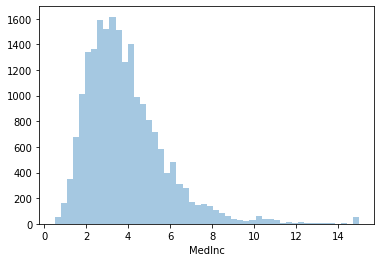

In [25]:
sns.distplot(df['MedInc'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


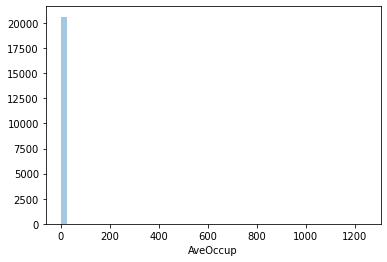

In [26]:
sns.distplot(df['AveOccup'], kde=False) # Large Outliers. 1243 occupants?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


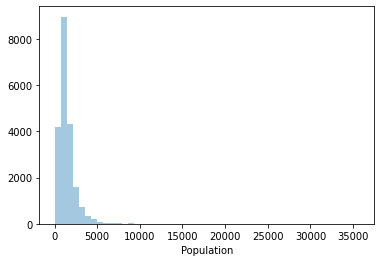

In [27]:
sns.distplot(df['Population'], kde=False) #Outliers. 35682 max but mean 1425

In [28]:
X = X[['MedInc', 'AveOccup']].copy()
column_names = X.columns


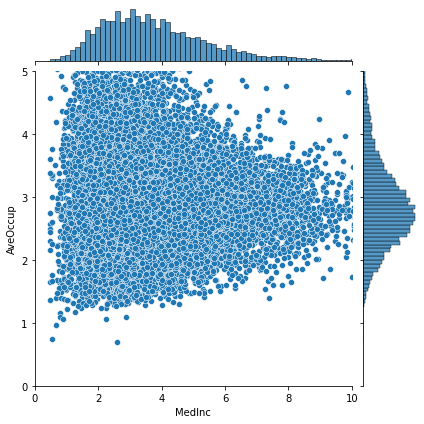

In [29]:
sns.jointplot(x='MedInc', y='AveOccup', data=X, xlim=[0,10], ylim=[0,5] ) # xlim=[0,10], ylim=[0,5]


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

#Other transformations not shown below. 
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer

             MedInc      AveOccup
count  2.064000e+04  2.064000e+04
mean   3.734255e-16  6.064808e-19
std    1.000024e+00  1.000024e+00
min   -1.774299e+00 -2.290000e-01
25%   -6.881186e-01 -6.171062e-02
50%   -1.767951e-01 -2.431585e-02
75%    4.593063e-01  2.037453e-02
max    5.858286e+00  1.194191e+02


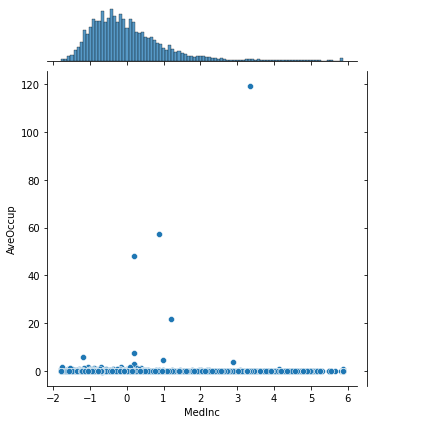

In [31]:
#1 Standard scaler
#removes the mean and scales the data to unit variance.
# But, outliers have influence when computing mean and std. dev.
scaler1 = StandardScaler()
scaler1.fit(X)
X1 = scaler1.transform(X)
df1 = pd.DataFrame(data=X1, columns=column_names)
print(df1.describe())
sns.jointplot(x='MedInc', y='AveOccup', data=df1)  #Data scaled but outliers still exist


             MedInc      AveOccup
count  20640.000000  20640.000000
mean       0.232464      0.001914
std        0.131020      0.008358
min        0.000000      0.000000
25%        0.142308      0.001398
50%        0.209301      0.001711
75%        0.292641      0.002084
max        1.000000      1.000000


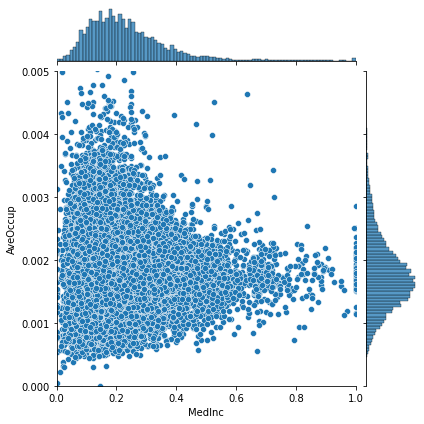

In [32]:
#2 MinMaxScaler
#rescales the data set such that all feature values are in the range [0, 1] 
#For large outliers, it compresses lower values to too small numbers.
#Sensitive to outliers.
scaler2 = MinMaxScaler()
scaler2.fit(X)
X2 = scaler2.transform(X)
df2 = pd.DataFrame(data=X2, columns=column_names)
print(df2.describe())
sns.jointplot(x='MedInc', y='AveOccup', data=df2, xlim=[0,1], ylim=[0,0.005])  #Data scaled but outliers still exist

             MedInc      AveOccup
count  2.064000e+04  20640.000000
mean   1.540799e-01      0.296227
std    8.715378e-01     12.182767
min   -1.392252e+00     -2.493559
25%   -4.456270e-01     -0.455561
50%    1.018608e-16      0.000000
75%    5.543730e-01      0.544439
max    5.259674e+00   1455.116059


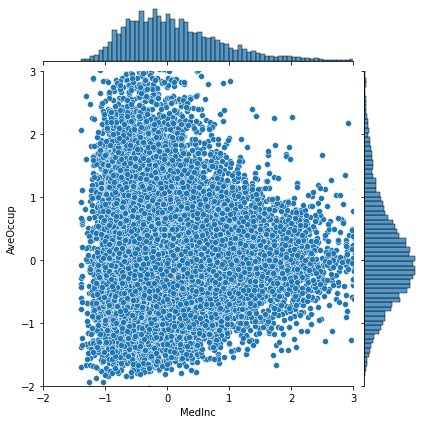

In [33]:
#3 RobustScaler
# the centering and scaling statistics of this scaler are based on percentiles 
#and are therefore not influenced by a few number of very large marginal outliers.
scaler3 = RobustScaler()
scaler3.fit(X)
X3 = scaler3.transform(X)
df3 = pd.DataFrame(data=X3, columns=column_names)
print(df3.describe())
sns.jointplot(x='MedInc', y='AveOccup', data=df3, xlim=[-2,3], ylim = [-2,3]) #Range -2 to 3

             MedInc      AveOccup
count  2.064000e+04  2.064000e+04
mean   6.134466e-16 -5.637824e-16
std    1.000024e+00  1.000024e+00
min   -3.446085e+00 -6.437977e+00
25%   -6.709354e-01 -5.790413e-01
50%    2.099591e-02  2.750554e-02
75%    6.677096e-01  6.144620e-01
max    3.146571e+00  5.969823e+00


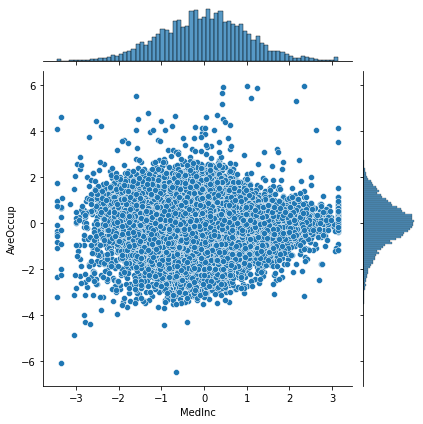

In [34]:

#4 PowerTransformer
# applies a power transformation to each feature to make the data more Gaussian-like
scaler4 = PowerTransformer()
scaler4.fit(X)
X4 = scaler4.transform(X)
df4 = pd.DataFrame(data=X4, columns=column_names)
print(df4.describe())
sns.jointplot(x='MedInc', y='AveOccup', data=df4) #

             MedInc      AveOccup
count  20640.000000  20640.000000
mean       0.500000      0.500001
std        0.288701      0.288694
min        0.000000      0.000000
25%        0.249750      0.249909
50%        0.499935      0.499857
75%        0.749895      0.750132
max        1.000000      1.000000


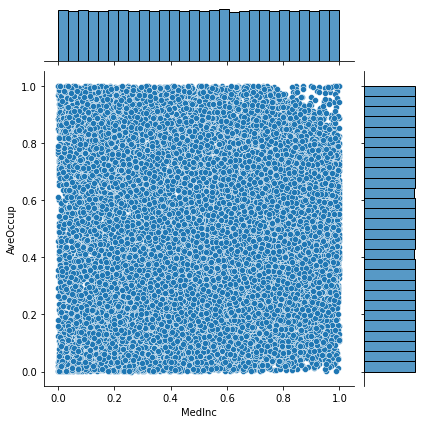

In [35]:
#5 QuantileTransformer
# has an additional output_distribution parameter allowing to match a 
# Gaussian distribution instead of a uniform distribution.
scaler5 = QuantileTransformer()
scaler5.fit(X)
X5 = scaler5.transform(X)
df5 = pd.DataFrame(data=X5, columns=column_names)
print(df5.describe())
sns.jointplot(x='MedInc', y='AveOccup', data=df5) #



In [36]:
df = pd.read_csv('/content/drive/MyDrive/dataset/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [37]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


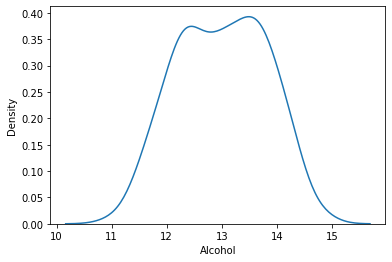

In [38]:
sns.kdeplot(df['Alcohol'])


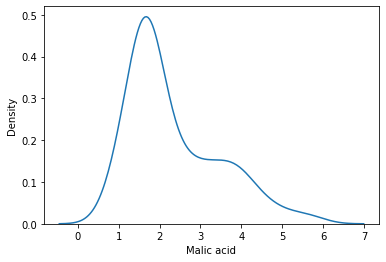

In [39]:
sns.kdeplot(df['Malic acid'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


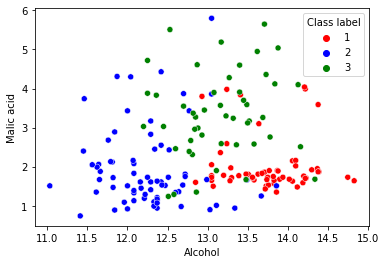

In [40]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [41]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
np.round(X_train.describe(), 1)


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [45]:
np.round(X_train_scaled.describe(), 1)


,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


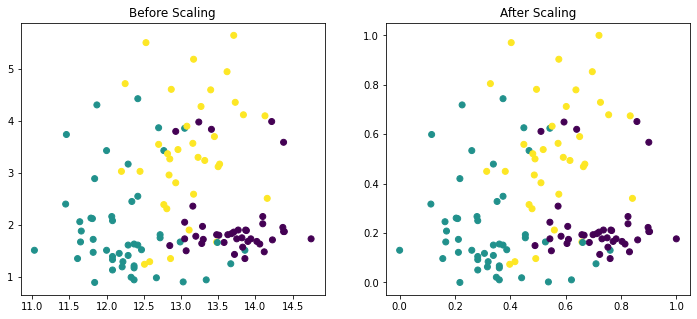

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

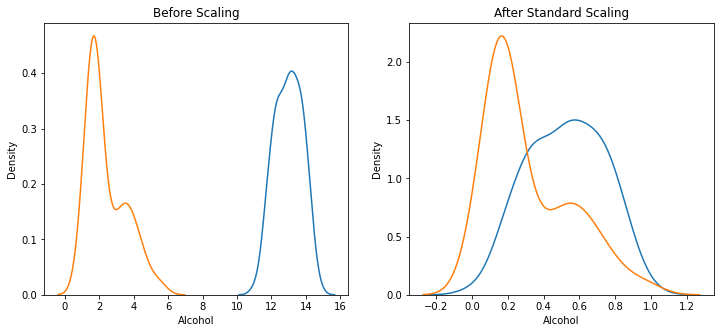

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

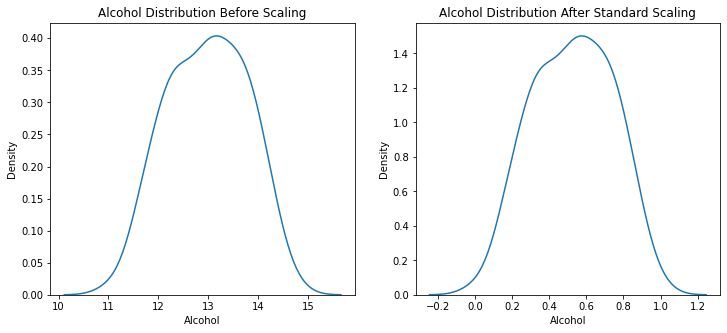

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

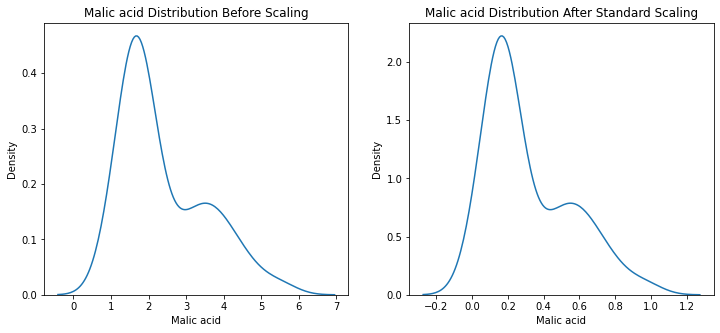

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()